In [1]:
import pkg_resources
import pip
installedPackages = {pkg.key for pkg in pkg_resources.working_set}
if 'cvxopt' not in installedPackages :
    !pip install cvxopt==1.2.5
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import date
import datetime

#Import Model Packages 
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from sklearn.metrics import adjusted_mutual_info_score
from sklearn import cluster, covariance, manifold

#Package for optimization of mean variance optimization
import cvxopt as opt
from cvxopt import blas, solvers

In [2]:
# IMPORT CSV FILES
AAPL = pd.read_csv('AAPL.csv')
MSFT = pd.read_csv('MSFT.csv')
GOOG = pd.read_csv('GOOG.csv')
UNH = pd.read_csv('UNH.csv')
PFE = pd.read_csv('PFE.csv')
JNJ = pd.read_csv('JNJ.csv')
COST = pd.read_csv('COST.csv')
EBAY = pd.read_csv('EBAY.csv')
AMZN = pd.read_csv('AMZN.csv')
JPM = pd.read_csv('JPM.csv')
BAC = pd.read_csv('BAC.csv')
HSBC = pd.read_csv('HSBC.csv')
XOM = pd.read_csv('XOM.csv')
COP = pd.read_csv('COP.csv')
EOG = pd.read_csv('EOG.csv')

d = {
    'AAPL': AAPL, 'MSFT': MSFT, 'GOOG' : GOOG, 'UNH' : UNH, 'PFE': PFE, 'JNJ': JNJ, 'COST': COST, 'EBAY': EBAY,
    'AMZN': AMZN, 'JPM': JPM, 'BAC': BAC, 'HSBC': HSBC, 'XOM': XOM, 'COP': COP, 'EOG': EOG
}

#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

start_date = datetime.datetime(2015, 1, 1)
end_date = datetime.datetime(2022, 8, 29)

#Keep only date and closing price 
for df in d.values():
    df.drop(df.columns[[1,2,3,4,6]], axis=1, inplace=True)
    #     df.set_index(["Date"], inplace = True)
    df['Date'] = pd.to_datetime(df.Date, infer_datetime_format=True)
    
AAPL = AAPL.loc[AAPL["Date"] >= start_date]
AAPL = AAPL.loc[AAPL["Date"] <= end_date]
AAPL = AAPL.sort_values(by = ['Date'], ascending = True)

MSFT = MSFT.loc[MSFT["Date"] >= start_date]
MSFT = MSFT.loc[MSFT["Date"] <= end_date]
MSFT = MSFT.sort_values(by = ['Date'], ascending = True)

GOOG = GOOG.loc[GOOG["Date"] >= start_date]
GOOG = GOOG.loc[GOOG["Date"] <= end_date]
GOOG = GOOG.sort_values(by = ['Date'], ascending = True)

UNH = UNH.loc[UNH["Date"] >= start_date]
UNH = UNH.loc[UNH["Date"] <= end_date]
UNH = UNH.sort_values(by = ['Date'], ascending = True)

PFE = PFE.loc[PFE["Date"] >= start_date]
PFE = PFE.loc[PFE["Date"] <= end_date]
PFE = PFE.sort_values(by = ['Date'], ascending = True)

JNJ = JNJ.loc[JNJ["Date"] >= start_date]
JNJ = JNJ.loc[JNJ["Date"] <= end_date]
JNJ = JNJ.sort_values(by = ['Date'], ascending = True)

COST = COST.loc[COST["Date"] >= start_date]
COST = COST.loc[COST["Date"] <= end_date]
COST = COST.sort_values(by = ['Date'], ascending = True)

EBAY = EBAY.loc[EBAY["Date"] >= start_date]
EBAY = EBAY.loc[EBAY["Date"] <= end_date]
EBAY = EBAY.sort_values(by = ['Date'], ascending = True)

AMZN = AMZN.loc[AMZN["Date"] >= start_date]
AMZN = AMZN.loc[AMZN["Date"] <= end_date]
AMZN = AMZN.sort_values(by = ['Date'], ascending = True)

JPM = JPM.loc[JPM["Date"] >= start_date]
JPM = JPM.loc[JPM["Date"] <= end_date]
JPM = JPM.sort_values(by = ['Date'], ascending = True)

BAC = BAC.loc[BAC["Date"] >= start_date]
BAC = BAC.loc[BAC["Date"] <= end_date]
BAC = BAC.sort_values(by = ['Date'], ascending = True)

HSBC = HSBC.loc[HSBC["Date"] >= start_date]
HSBC = HSBC.loc[HSBC["Date"] <= end_date]
HSCB = HSBC.sort_values(by = ['Date'], ascending = True)

XOM = XOM.loc[XOM["Date"] >= start_date]
XOM = XOM.loc[XOM["Date"] <= end_date]
XOM = XOM.sort_values(by = ['Date'], ascending = True)

COP = COP.loc[COP["Date"] >= start_date]
COP = COP.loc[COP["Date"] <= end_date]
COP = COP.sort_values(by = ['Date'], ascending = True)

EOG = EOG.loc[EOG["Date"] >= start_date]
EOG = EOG.loc[EOG["Date"] <= end_date]
EOG = EOG.sort_values(by = ['Date'], ascending = True)

col_names = ['AAPL', 'MSFT', 'GOOG', 'UNH', 'PFE', 'JNJ', 'COST', 'EBAY', 'AMZN', 'JPM', 'BAC', 'HSBC', 
                  'XOM', 'COP', 'EOG']

final_df = pd.DataFrame(index = AAPL['Date'], columns = col_names)

AAPL.set_index(['Date'], inplace = True)
MSFT.set_index(['Date'], inplace = True)
GOOG.set_index(['Date'], inplace = True)
UNH.set_index(['Date'], inplace = True)
PFE.set_index(['Date'], inplace = True)
JNJ.set_index(['Date'], inplace = True)
COST.set_index(['Date'], inplace = True)
EBAY.set_index(['Date'], inplace = True)
AMZN.set_index(['Date'], inplace = True)
JPM.set_index(['Date'], inplace = True)
BAC.set_index(['Date'], inplace = True)
HSBC.set_index(['Date'], inplace = True)
XOM.set_index(['Date'], inplace = True)
COP.set_index(['Date'], inplace = True)
EOG.set_index(['Date'], inplace = True)

final_df['AAPL'] = AAPL['Close']
final_df['MSFT'] = MSFT['Close']
final_df['GOOG'] = GOOG['Close']
final_df['UNH'] = UNH['Close']
final_df['PFE'] = PFE['Close']
final_df['JNJ'] = JNJ['Close']
final_df['COST'] = COST['Close']
final_df['EBAY'] = EBAY['Close']
final_df['AMZN'] = AMZN['Close']
final_df['JPM'] = JPM['Close']
final_df['BAC'] = BAC['Close']
final_df['HSBC'] = HSBC['Close']
final_df['XOM'] = XOM['Close']
final_df['COP'] = COP['Close']
final_df['EOG'] = EOG['Close']

final_df

,AAPL,MSFT,GOOG,UNH,PFE,JNJ,COST,EBAY,AMZN,JPM,BAC,HSBC,XOM,COP,EOG
Date,,,,,,,,,,,,,,,
2015-01-04,31.062500,NaN,NaN,NaN,32.571156,99.150002,150.240005,NaN,NaN,NaN,NaN,NaN,84.459999,NaN,91.220001
2015-01-05,32.237499,46.330002,25.623152,99.120003,32.333965,100.129997,145.389999,23.459597,15.109500,60.549999,17.379999,45.990002,88.849998,65.639999,98.900002
2015-01-06,32.634998,45.650002,25.029282,98.919998,32.789375,100.040001,142.389999,23.156567,14.764500,58.980000,16.860001,45.320000,85.129997,62.930000,88.760002
2015-01-07,31.650000,46.230000,24.986401,99.930000,31.963947,98.470001,136.490005,23.118687,14.921000,59.070000,16.940001,45.669998,82.370003,63.349998,85.769997
2015-01-09,26.930000,47.189999,24.740576,103.720001,29.753321,92.089996,138.300003,23.413300,14.846500,59.340000,16.980000,45.580002,72.080002,64.919998,76.019997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-23,167.229996,276.440002,114.769997,535.799988,48.009998,166.130005,542.070007,45.430000,133.619995,115.519997,34.410000,31.410000,98.000000,108.449997,121.779999
2022-08-24,167.529999,275.790009,114.699997,536.460022,47.430000,165.580002,543.219971,45.529999,133.800003,115.800003,34.520000,30.850000,98.580002,110.519997,123.900002
2022-08-25,170.029999,278.850006,117.699997,541.570007,47.900002,167.130005,550.770020,46.590000,137.279999,118.550003,35.139999,31.170000,99.089996,112.080002,125.220001


In [3]:
#Checking for any null values and removing the null values'''
print('Null Values =',final_df.isnull().values.any())
final_df.shape

Null Values = True


(1905, 15)

In [31]:
X = final_df.copy('deep')
#row = len(X)
#train_len = 1762
#X_train = X.head(train_len)
#X_test = X.tail(142)

row= len(X)
train_len = int(row*.8)
X_train = X.head(train_len)
X_test = X.tail(row-train_len)

#Calculate percentage return 
returns = X_train.pct_change().dropna()
returns_test = X_test.pct_change().dropna()

In [33]:
X_train.tail()

,AAPL,MSFT,GOOG,UNH,PFE,JNJ,COST,EBAY,AMZN,JPM,BAC,HSBC,XOM,COP,EOG
Date,,,,,,,,,,,,,,,
2021-01-12,164.770004,214.929993,87.327499,357.369995,54.680000,158.080002,529.840027,56.040001,156.041504,140.220001,33.660000,28.010000,59.790001,47.419998,85.349998
2021-01-13,130.889999,216.339996,87.720001,355.040009,36.860001,157.889999,366.950012,55.709999,158.294495,140.350006,33.459999,27.420000,48.419998,47.029999,60.470001
2021-01-14,128.910004,213.020004,87.009003,350.529999,36.750000,160.649994,362.350006,55.270000,156.373505,141.169998,33.990002,27.790001,50.310001,47.869999,62.240002
2021-01-15,127.139999,212.649994,86.809502,351.299988,36.700001,160.300003,362.160004,55.419998,155.212494,138.639999,33.009998,27.350000,47.889999,45.119999,59.189999
2021-01-19,127.830002,216.440002,89.542999,352.190002,36.730000,162.779999,354.470001,56.980000,156.037994,138.039993,32.770000,28.010000,48.840000,46.000000,60.480000


In [20]:
X_test.head()

,AAPL,MSFT,GOOG,UNH,PFE,JNJ,COST,EBAY,AMZN,JPM,BAC,HSBC,XOM,COP,EOG
Date,,,,,,,,,,,,,,,
2022-01-02,174.610001,NaN,NaN,NaN,53.070000,170.880005,508.410004,NaN,NaN,NaN,NaN,NaN,80.830002,NaN,113.180000
2022-01-03,163.199997,334.750000,145.074493,502.279999,45.750000,164.000000,522.929993,66.800003,170.404495,161.699997,46.180000,30.450001,79.169998,73.769997,116.410004
2022-01-04,174.309998,329.010010,144.416504,490.899994,51.570000,178.190002,575.570007,65.139999,167.522003,167.830002,47.990002,31.820000,83.120003,76.970001,120.330002
2022-01-06,148.710007,313.880005,137.550995,469.649994,52.369999,177.710007,456.989990,66.809998,163.253998,165.520004,48.130001,32.450001,97.839996,78.489998,139.929993
2022-01-07,138.929993,314.040009,137.004501,458.600006,52.310001,179.520004,485.760010,66.320000,162.554001,167.160004,49.180000,32.740002,87.550003,80.639999,111.620003


In [5]:
def correlDist(corr):
    # A distance matrix based on correlation, where 0<=d[i,j]<=1
    # This is a proper distance metric
    dist = ((1 - corr) / 2.)**.5  # distance matrix
    return dist

In [6]:
#Calulate linkage
dist = correlDist(returns.corr())
link = linkage(dist, 'ward')
link[0]

array([ 9.        , 10.        ,  0.28238129,  2.        ])

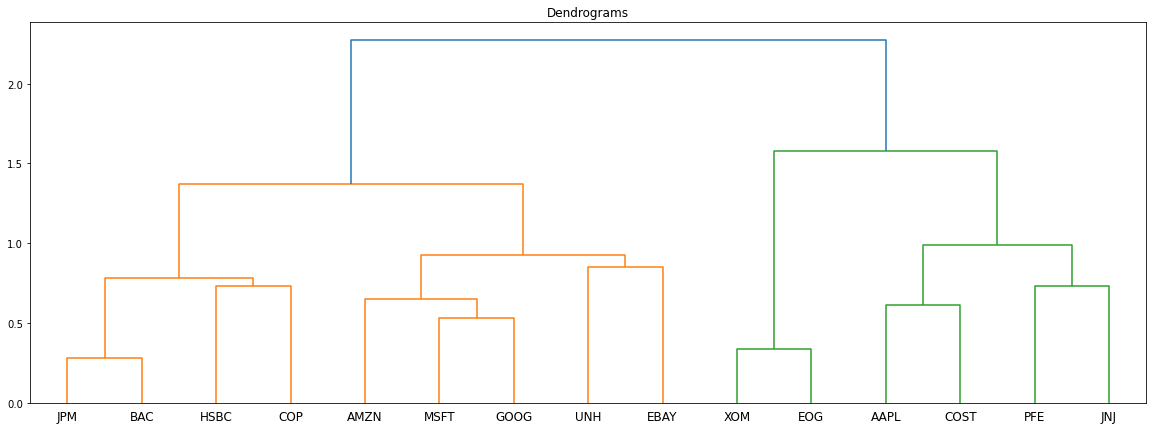

In [7]:
#Plot Dendogram
plt.figure(figsize=(20, 7))
plt.title("Dendrograms")
dendrogram(link,labels = X.columns)
plt.show()


In [8]:
def getQuasiDiag(link):
    # Sort clustered items by distance
    link = link.astype(int)
    sortIx = pd.Series([link[-1, 0], link[-1, 1]])
    numItems = link[-1, 3]  # number of original items
    while sortIx.max() >= numItems:
        sortIx.index = range(0, sortIx.shape[0] * 2, 2)  # make space
        df0 = sortIx[sortIx >= numItems]  # find clusters
        i = df0.index
        j = df0.values - numItems
        sortIx[i] = link[j, 0]  # item 1
        df0 = pd.Series(link[j, 1], index=i + 1)
        sortIx = sortIx.append(df0)  # item 2
        sortIx = sortIx.sort_index()  # re-sort
        sortIx.index = range(sortIx.shape[0])  # re-index
    return sortIx.tolist()

In [9]:
def getClusterVar(cov,cItems):
    # Compute variance per cluster
    cov_=cov.loc[cItems,cItems] # matrix slice
    w_=getIVP(cov_).reshape(-1,1)
    cVar=np.dot(np.dot(w_.T,cov_),w_)[0,0]
    return cVar



def getRecBipart(cov, sortIx):
    # Compute HRP alloc
    w = pd.Series(1, index=sortIx)
    cItems = [sortIx]  # initialize all items in one cluster
    while len(cItems) > 0:
        cItems = [i[j:k] for i in cItems for j, k in ((0, len(i) // 2), (len(i) // 2, len(i))) if len(i) > 1]  # bi-section
        for i in range(0, len(cItems), 2):  # parse in pairs
            cItems0 = cItems[i]  # cluster 1
            cItems1 = cItems[i + 1]  # cluster 2
            cVar0 = getClusterVar(cov, cItems0)
            cVar1 = getClusterVar(cov, cItems1)
            alpha = 1 - cVar0 / (cVar0 + cVar1)
            w[cItems0] *= alpha  # weight 1
            w[cItems1] *= 1 - alpha  # weight 2
    return w

In [10]:
def getMVP(cov):

    cov = cov.T.values
    n = len(cov)
    N = 100
    mus = [10 ** (5.0 * t / N - 1.0) for t in range(N)]

    # Convert to cvxopt matrices
    S = opt.matrix(cov)
    #pbar = opt.matrix(np.mean(returns, axis=1))
    pbar = opt.matrix(np.ones(cov.shape[0]))

    # Create constraint matrices
    G = -opt.matrix(np.eye(n))  # negative n x n identity matrix
    h = opt.matrix(0.0, (n, 1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    
    # Calculate efficient frontier weights using quadratic programming
    solvers.options['show_progress'] = False
    portfolios = [solvers.qp(mu * S, -pbar, G, h, A, b)['x']
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER    
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S * x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO    
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']

    return list(wt)

def getIVP(cov, **kargs):
    # Compute the inverse-variance portfolio
    ivp = 1. / np.diag(cov)
    ivp /= ivp.sum()
    return ivp

def getHRP(cov, corr):
    # Construct a hierarchical portfolio
    dist = correlDist(corr)
    link = sch.linkage(dist, 'single')
    #plt.figure(figsize=(20, 10))
    #dn = sch.dendrogram(link, labels=cov.index.values)
    #plt.show()
    sortIx = getQuasiDiag(link)
    sortIx = corr.index[sortIx].tolist()
    hrp = getRecBipart(cov, sortIx)
    return hrp.sort_index()

In [11]:
def get_all_portfolios(returns):
    
    cov, corr = returns.cov(), returns.corr()
    hrp = getHRP(cov, corr)
    mvp = getMVP(cov)
    mvp = pd.Series(mvp, index=cov.index)
    portfolios = pd.DataFrame([mvp, hrp], index=['MVP', 'HRP']).T
    #portfolios = pd.DataFrame([ivp, hrp], index=['IVP', 'HRP']).T
    return portfolios

In [12]:
portfolios = get_all_portfolios(returns)
portfolios

,MVP,HRP
AAPL,0.000309,0.005644
MSFT,0.011741,0.180454
GOOG,0.087920,0.180799
UNH,0.190990,0.095914
PFE,0.007389,0.013863
JNJ,0.061539,0.030996
COST,0.016537,0.011133
EBAY,0.188150,0.127612
AMZN,0.116503,0.074777
JPM,0.006743,0.058666


Text(0.5, 1.0, 'HRP')

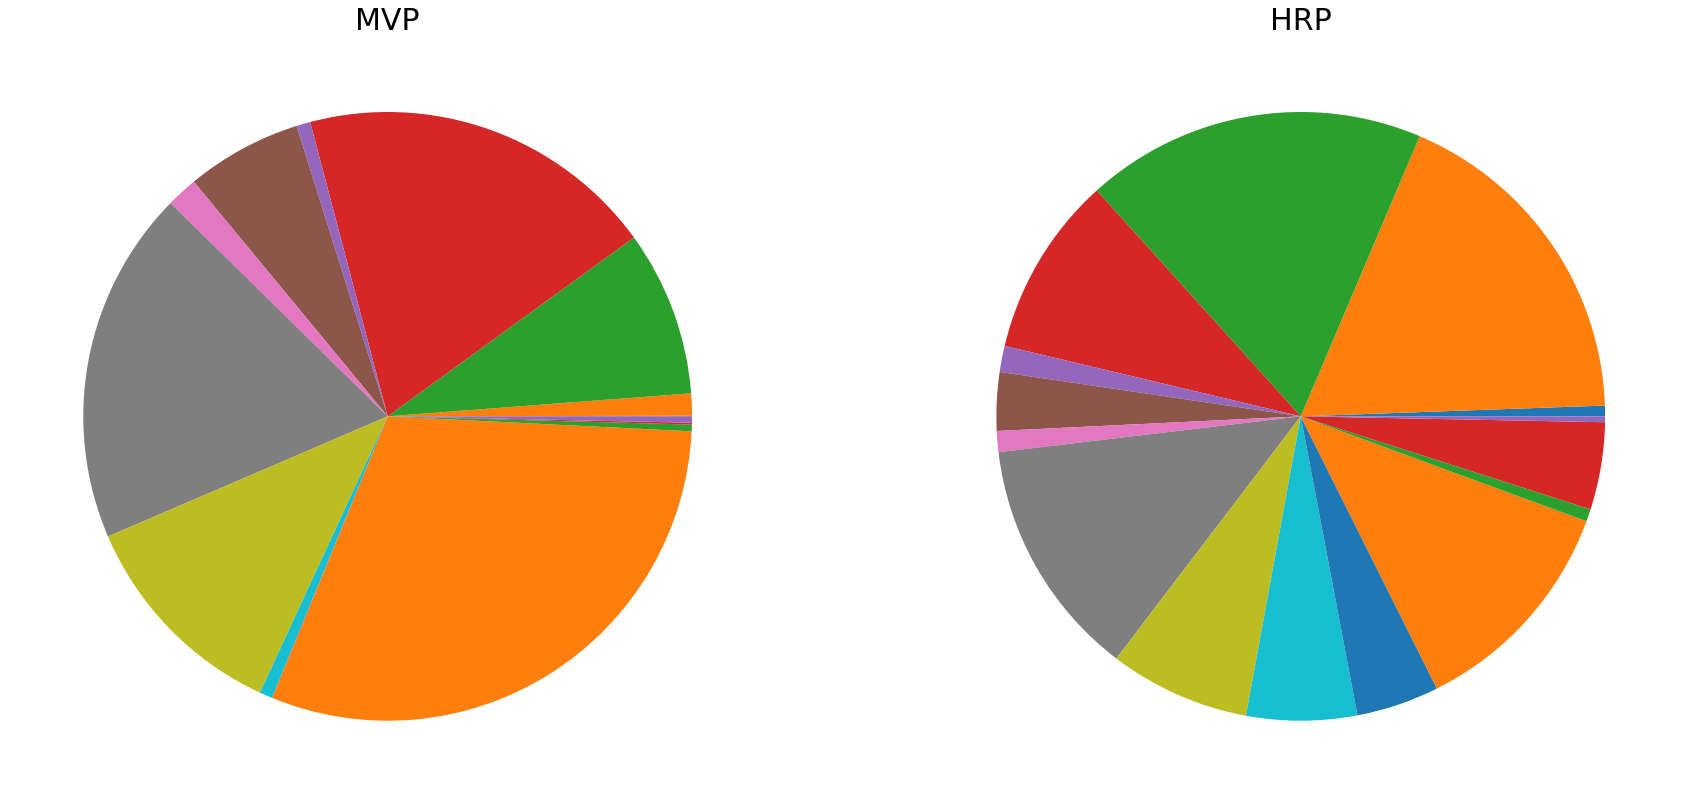

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(30,20))
ax1.pie(portfolios.iloc[:,0], );
ax1.set_title('MVP',fontsize = 30)
ax2.pie(portfolios.iloc[:,1]);
ax2.set_title('HRP',fontsize = 30)
#portfolios.plot.pie(subplots=True, figsize=(20, 10),legend = False);

In [14]:
Insample_Result=pd.DataFrame(np.dot(returns,np.array(portfolios)), \
                             columns=['MVP', 'HRP'], index = returns.index)
OutOfSample_Result=pd.DataFrame(np.dot(returns_test,np.array(portfolios)), \
                                columns=['MVP', 'HRP'], index = returns_test.index)

In [15]:
Insample_Result.head()

,MVP,HRP
Date,,
2015-01-06,-0.013118,-0.017473
2015-01-07,0.003169,0.003298
2015-01-09,0.002749,0.003311
2015-01-10,0.001578,0.001259
2015-01-12,0.002881,-0.002877


Text(0.5, 1.0, 'Out-Sample Results')

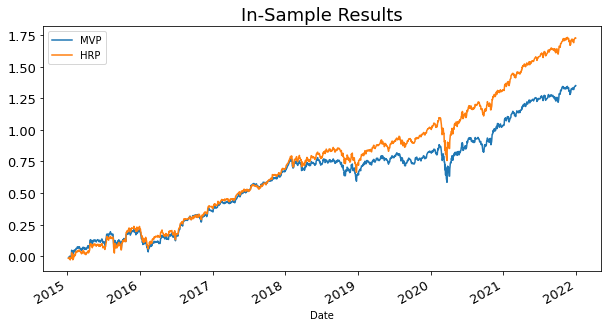

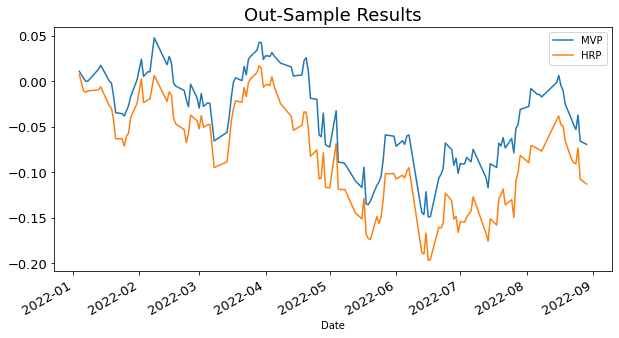

In [27]:
Insample_Result.cumsum().plot(figsize=(10, 5), fontsize=13)
plt.title("In-Sample Results", fontsize = 18)
OutOfSample_Result.cumsum().plot(figsize=(10, 5), fontsize=13)
plt.title("Out-Sample Results", fontsize = 18)

In [17]:
#In_sample Results
stddev = Insample_Result.std() * np.sqrt(252)
sharp_ratio = (Insample_Result.mean()*np.sqrt(252))/(Insample_Result).std()
Results = pd.DataFrame(dict(stdev=stddev, sharp_ratio = sharp_ratio))
Results

,stdev,sharp_ratio
MVP,0.178426,1.082975
HRP,0.191771,1.288092


In [18]:
#Outof_sample Results
stddev_oos = OutOfSample_Result.std() * np.sqrt(252)
sharp_ratio_oos = (OutOfSample_Result.mean()*np.sqrt(252))/(OutOfSample_Result).std()
Results_oos = pd.DataFrame(dict(stdev_oos=stddev_oos, sharp_ratio_oos = sharp_ratio_oos))
Results_oos

,stdev_oos,sharp_ratio_oos
MVP,0.282769,-0.442405
HRP,0.303740,-0.669868
